# 1. Cargando Datos

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Lectura de datos
train = pd.read_csv('./../data/train.csv')
test = pd.read_csv('./../data/test.csv')

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Exploracion de los datos

In [15]:
# Cuales son las columnas que manejan los datos
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# Qué tamaño tienen los datos
train.shape

(891, 12)

_Son 891 **filas** y 12 **columnas**_

In [17]:
# ¿Tenemos valores nulos en los datos?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


_**Faltan datos en Age que tiene 714, en Cabin que solamente tiene 204 y en Embarked nos faltan 2**_

In [18]:
# Como se distribuyen las variables numéricas
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# Como se comportan las variables categóricas
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Aqui podemos denotar que mayormente habia hombres en el titanic y el embarque mas común era por _Southampton_**

## 2.1 EDA: Estudio de variable target

In [22]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

**Nos damos cuenta por el modelo que hay 549 personas que no sobrevivieron en el choque del titanic**

In [23]:
# Target vs Sex
train.groupby(['Survived', 'Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

**Al momento de compararlos con los datos de la columna _Sex_ podemos ver que de esas muertes _81_ mujeres y _468_ hombres,
probablemente porque las mujeres tenian una prioridad en los botes salvadidas, esto lo reflejamos ya que el resulatado
nos muestra que sobrevivieron _223_ mujeres y _109_ hombres**

**Con estos datos pudimos calcula que _74.20%_ de mujeres sobrevivieron y que solamente el _18.89%_ de hombres sobrevivieron**

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


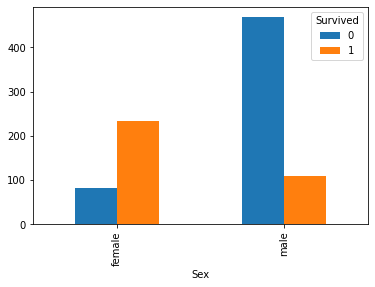

In [30]:
grouped_sex = train.groupby(['Survived', 'Sex']).count()['PassengerId']
print(grouped_sex)
(grouped_sex.unstack(level=0).plot.bar())
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


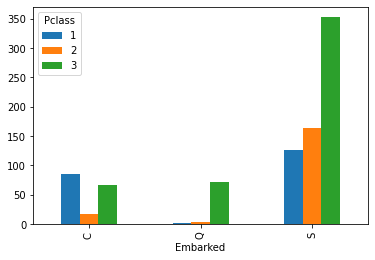

In [31]:
# Embarked vs Pclass
print(train.groupby(['Pclass', 'Embarked'])
      .count()['PassengerId']
      .unstack(level=0).plot.bar())

**No se encontro una relación entre la clase de los pasajeros y embarque, mas
allá de que un mayor numero de personas se embarcaron en _Southampton_**

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
Name: PassengerId, dtype: int64


<AxesSubplot:xlabel='Survived,Sex'>

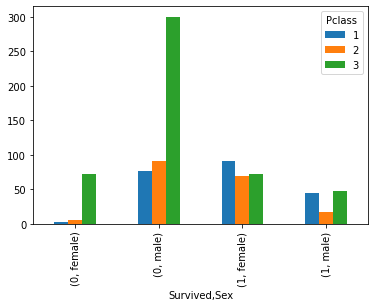

In [32]:
# Pclass vs Sex vs Survived
prueba = train.groupby(['Pclass', 'Survived', 'Sex']).count()['PassengerId']
print (prueba)
(prueba.unstack(level=0).plot(kind="bar"))

**De esta grafica se puede intuir que:**
- _Las personas mas pobres fueron donde mas fallecidos hubo accidente._
- _Se revalidan los datos de que las mujeres sobrevivieron mas que los hombres._
- _Había menos personas de clase 2 que cualquier otra._

# 3. Procesamiento de los datos